In [6]:
### import packages

## lets basic import packages

import numpy as np #libraries used for arrays 
import pandas as pd # mostly for data reading from csv files
import matplotlib.pyplot as plt # used for Data visualization like ploting graphs etc
import seaborn as sns #for making statistical graphics and easy to integrate with panda 
from sklearn.model_selection import train_test_split #split data into train and test 
from sklearn.utils import shuffle #used for shuffling attributes
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [7]:
## import data

df = pd.read_csv('dataset.csv')
df = shuffle(df, random_state = 42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
## remove ('_') underscore in the text

for col in df.columns:
    df[col] = df[col].str.replace('_', ' ')
    
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## charactieristics of data

df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [10]:
## check null values

null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


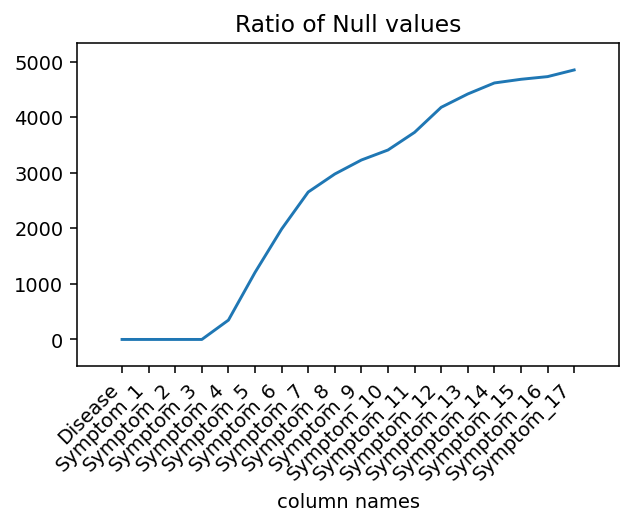

In [11]:
## plot of null value

plt.figure(figsize=(5, 3), dpi=140)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Ratio of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [12]:
cols = df.columns

data = df[cols].values.flatten()

reshaped = pd.Series(data)
reshaped = reshaped.str.strip()
reshaped = reshaped.values.reshape(df.shape)

df = pd.DataFrame(reshaped, columns = df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## lets fill nan values

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [14]:
## lets explore symptom severity

df_severity = pd.read_csv('Symptom-severity.csv')
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_',' ')
df_severity.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [15]:
## overall list

df_severity['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [16]:
## lets encode sysptoms in the data

vals = df.values
symptoms = df_severity['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]

In [17]:
df_processed = pd.DataFrame(vals, columns=cols)
df_processed.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [18]:
## assign symptoms with no rank to zero

df_processed = df_processed.replace('dischromic  patches', 0)
df_processed = df_processed.replace('spotting  urination', 0)
df_processed = df_processed.replace('foul smell of urine', 0)

In [19]:
## split data

data = df_processed.iloc[:,1:].values
labels = df['Disease'].values

In [23]:
## split train and test data

# help(train_test_split)

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3936, 17) (3936,) (984, 17) (984,)


In [25]:
print(X_train[0])
print(X_test[0])
print(y_train[0])
print (y_test[0])

[6 4 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
[3 5 3 5 4 4 3 2 3 0 0 0 0 0 0 0 0]
Urinary tract infection
Migraine


In [26]:
#implementation of decision tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

print (tree.fit(X_train, y_train))

print (tree.score(X_train, y_train))
tree.predict([[3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0]])

DecisionTreeClassifier()
0.9949186991869918


array(['Migraine'], dtype=object)

In [31]:
#finding Accuracy
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion="entropy")
#training model 
tree1.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))
#prediction on model
prediction = tree1.predict(X_test)
print("Predicted values:", prediction)

Accuracy on training set: 0.995
Accuracy on test set: 0.996
Predicted values: ['Migraine' 'Peptic ulcer diseae' 'Fungal infection' 'Hypoglycemia'
 'Hepatitis B' 'Hepatitis B' 'Pneumonia' 'Jaundice' 'AIDS'
 'Alcoholic hepatitis' 'Cervical spondylosis' 'Osteoarthristis'
 'Cervical spondylosis' 'Malaria' 'GERD' 'Fungal infection'
 'Hypothyroidism' 'Hypoglycemia' 'Cervical spondylosis' 'Hepatitis E'
 'Arthritis' 'Common Cold' 'Cervical spondylosis' 'Hypertension'
 'Hepatitis E' 'Hepatitis D' 'Fungal infection'
 '(vertigo) Paroymsal  Positional Vertigo' 'Cervical spondylosis'
 'Hyperthyroidism' 'hepatitis A' 'Allergy' 'Cervical spondylosis'
 'Urinary tract infection' 'Typhoid' 'Acne' 'Jaundice' 'Tuberculosis'
 'Arthritis' 'Dengue' 'Tuberculosis' 'Chicken pox' 'Hypertension'
 'Migraine' 'Hepatitis D' 'Arthritis' 'Arthritis' 'Hypothyroidism'
 'Allergy' 'Dengue' 'GERD' 'Typhoid' 'Hypoglycemia' 'Hepatitis E'
 'Fungal infection' 'Drug Reaction' 'Hypertension' 'AIDS' 'Jaundice'
 'Common Cold' 'Hy

[Text(0.5775602409638554, 0.9583333333333334, 'x[6] <= 1.0\nentropy = 5.356\nsamples = 3936\nvalue = [102, 100, 88, 91, 101, 89, 92, 90, 93, 101, 95\n98, 97, 90, 99, 95, 96, 100, 102, 92, 101, 98\n90, 91, 96, 93, 92, 96, 95, 94, 102, 100, 101\n93, 99, 98, 97, 100, 96, 94, 99]'),
 Text(0.3674698795180723, 0.875, 'x[4] <= 3.5\nentropy = 4.534\nsamples = 2122\nvalue = [102, 100, 88, 30, 101, 89, 92, 90, 0, 33, 0, 0\n0, 90, 99, 95, 96, 100, 102, 0, 101, 0, 0, 91\n0, 0, 0, 96, 0, 0, 0, 100, 101, 93, 0, 98, 0\n0, 96, 39, 0]'),
 Text(0.22088353413654618, 0.7916666666666666, 'x[0] <= 3.5\nentropy = 3.902\nsamples = 1340\nvalue = [0, 100, 88, 0, 101, 89, 0, 36, 0, 0, 0, 0, 0\n21, 99, 95, 0, 100, 102, 0, 0, 0, 0, 91, 0, 0\n0, 96, 0, 0, 0, 27, 101, 0, 0, 98, 0, 0, 96\n0, 0]'),
 Text(0.11746987951807229, 0.7083333333333334, 'x[2] <= 4.5\nentropy = 3.314\nsamples = 790\nvalue = [0, 88, 88, 0, 0, 84, 0, 25, 0, 0, 0, 0, 0, 0\n99, 95, 0, 10, 0, 0, 0, 0, 0, 82, 0, 0, 0\n91, 0, 0, 0, 21, 9, 0, 0, 98, 0,

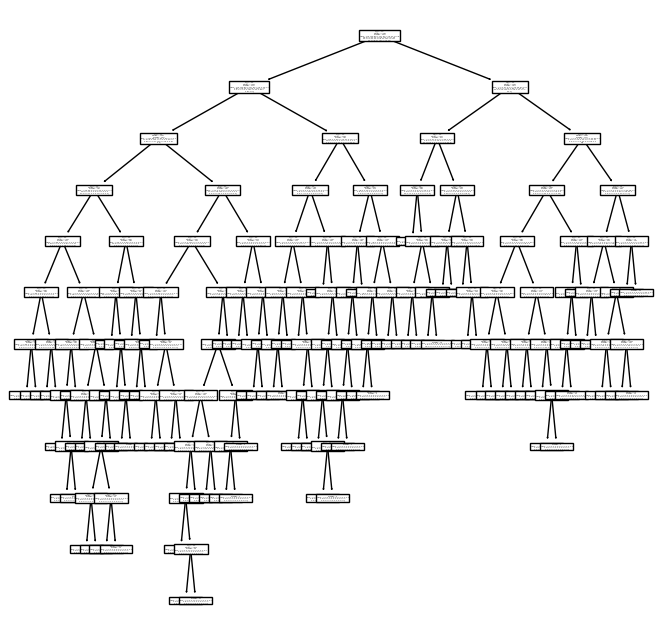

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,8))
plot_tree(tree1)